In [201]:
TF_ENABLE_ONEDNN_OPTS=0

In [202]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [203]:
#tf.compat.v1.disable_eager_execution()
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [204]:
tf.executing_eagerly()

True

In [205]:
import tensorflow as tf

# Check if a GPU is available
gpu_available = tf.config.experimental.list_physical_devices('GPU')

if gpu_available:
    # Display GPU details
    gpu_info = tf.config.experimental.get_visible_devices('GPU')
    for device in gpu_info:
        print('GPU:', device)
else:
    print('No GPU available.')


GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [206]:
import os
import glob
import numpy as np

# Plots and Images
import matplotlib.pyplot as plt
from IPython.display import Image
import SimpleITK as sitk

# Tensorflow and Keras
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.image import rgb_to_grayscale
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import boto3
import SimpleITK as sitk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt


In [207]:
import os

def count_raw_files(folder_path):
    # Initialize a variable to keep track of the count
    count = 0

    # List all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file and check if it has the .raw extension
    for file in files:
        if file.endswith(".npy"):
            count += 1

    return count

# Replace "path/to/your/folder" with the path to the folder containing the .raw files
folder_path = "2dcancer"

# Call the function to get the count of .raw files
raw_file_count = count_raw_files(folder_path)
print(f"Number of .npy files in the cancer folder: {raw_file_count}")


Number of .npy files in the cancer folder: 610


In [208]:
import os

def count_mhd_files(folder_path):
    # Initialize a variable to keep track of the count
    count = 0

    # List all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file and check if it has the .mhd extension
    for file in files:
        if file.endswith(".npy"):
            count += 1

    return count

# Replace "path/to/your/folder" with the path to the folder containing the .mhd files
folder_path = "2dnoncancer"

# Call the function to get the count of .mhd files
mhd_file_count = count_mhd_files(folder_path)
print(f"Number of .np files in the non cancer folder: {mhd_file_count}")


Number of .np files in the non cancer folder: 610


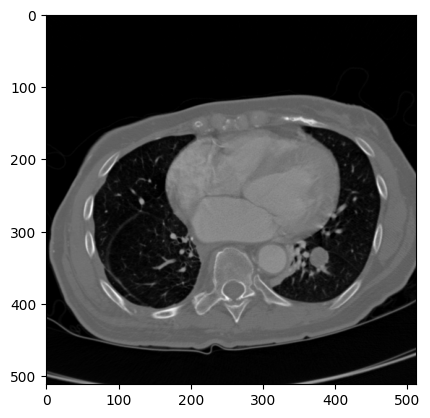

(512, 512)


In [209]:
cancer_image = np.load('2dcancer/1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405_142.npy')
plt.imshow(cancer_image, cmap='gray')
plt.show()
print(cancer_image.shape)

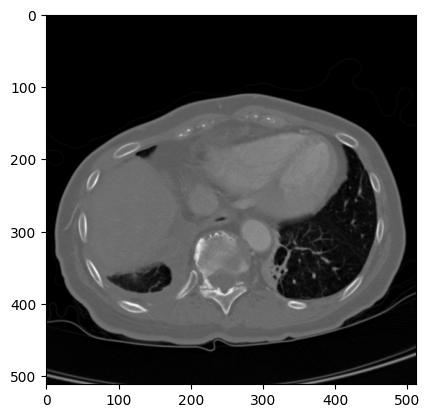

(512, 512)


In [210]:
non_cancer_image = np.load('2dnoncancer/1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405_101.npy')
plt.imshow(non_cancer_image, cmap='gray')
plt.show()
print(non_cancer_image.shape)

# Data Preprocessing

In [211]:
import os
import numpy as np

def read_npy_folder(folder_path):
    x_cancer = []  # List to store loaded .npy files
    y_cancer = []  # List to store labels

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".npy"):
            file_path = os.path.join(folder_path, file_name)

            # Load .npy file
            x_data = np.load(file_path)

            # Append loaded data to x_label
            x_cancer.append(x_data)

            # Append label (1 in this case) to y_label
            y_cancer.append(1)

    # Convert lists to NumPy arrays
    x_cancer = np.array(x_cancer)
    y_cancer = np.array(y_cancer)

    return x_cancer, y_cancer

In [212]:
# Provide the path to the folder containing .npy files
folder_path = "2dcancer"

# Call the function to read the folder
x_cancer, y_cancer = read_npy_folder(folder_path)

# Now you have your loaded data in x_data and corresponding labels in y_labels



In [213]:
print(x_cancer.shape)
print(y_cancer.shape)

(610, 512, 512)
(610,)


In [214]:
import os
import numpy as np

def read_npy_folder(folder_path):
    x_noncancer = []  # List to store loaded .npy files
    y_noncancer = []  # List to store labels

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".npy"):
            file_path = os.path.join(folder_path, file_name)

            # Load .npy file
            x_data = np.load(file_path)

            # Append loaded data to x_label
            x_noncancer.append(x_data)

            # Append label (1 in this case) to y_label
            y_noncancer.append(0)

    # Convert lists to NumPy arrays
    x_noncancer = np.array(x_noncancer)
    y_noncancer = np.array(y_noncancer)

    return x_noncancer, y_noncancer

In [215]:
folder_path = "2dnoncancer"

# Call the function to read the folder
x_noncancer, y_noncancer = read_npy_folder(folder_path)

In [216]:
print(x_noncancer.shape)
print(y_noncancer.shape)

(610, 512, 512)
(610,)


In [217]:
x_data = np.concatenate((x_cancer, x_noncancer), axis = 0)
x_data.shape

(1220, 512, 512)

In [218]:
import numpy as np
from scipy import ndimage


# Define the desired output shape
desired_shape = (1220, 256, 256)

# Calculate the resizing factors for each dimension
zoom_factors = [desired_dim / original_dim for desired_dim, original_dim in zip(desired_shape, x_data.shape)]

# Perform resizing using scipy.ndimage.zoom
resized_array = ndimage.zoom(x_data, zoom_factors, order=1)

print(resized_array.shape)

(1220, 256, 256)


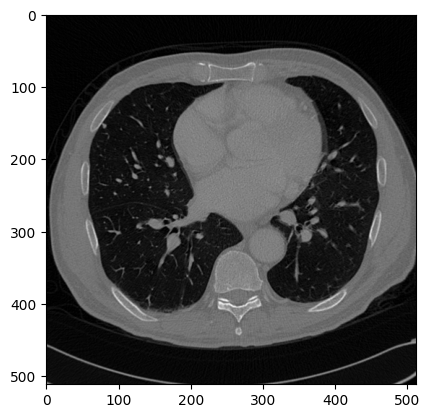

In [219]:
plt.imshow(x_data[0], cmap='gray')
plt.show()

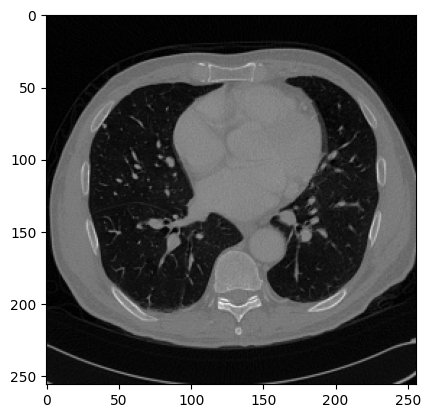

In [220]:
plt.imshow(resized_array[0], cmap='gray')
plt.show()

In [221]:
y_data = np.concatenate((y_cancer, y_noncancer), axis = 0)
y_data.shape

(1220,)

In [222]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(resized_array, y_data, test_size = 0.2, stratify = y_data)

# Check for data imbalance

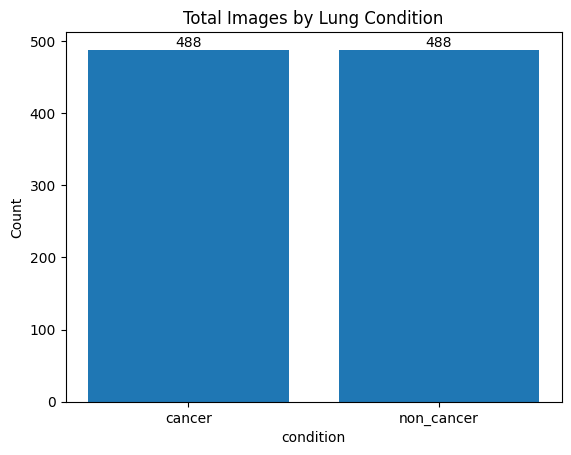

In [223]:
def count_ones_zeros(arr):
    ones_count = np.count_nonzero(arr == 1)
    zeros_count = np.count_nonzero(arr == 0)
    return ones_count, zeros_count


# Count the ones and zeros
ones, zeros = count_ones_zeros(y_train)

# Create a bar chart
labels = ['cancer', 'non_cancer']
counts = [ones, zeros]

plt.bar(labels, counts)
plt.xlabel('condition')
plt.ylabel('Count')
plt.title('Total Images by Lung Condition')

# Include count on the x-axis
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [224]:
channels = 1
xtrainn = np.expand_dims(x_train, axis=-1)  # -1 means adding a new dimension at the end
xtestt = np.expand_dims(x_test, axis=-1)  # -1 means adding a new dimension at the end
print("Image shape with channel:", xtrainn.shape)
print("Image shape with channel:", xtestt.shape)

Image shape with channel: (976, 256, 256, 1)
Image shape with channel: (244, 256, 256, 1)


#  Define Model

In [292]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(stddev=0.1, input_shape=(256, 256, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(5, 5)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(5, 5)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

# Compile the model and specify the loss function and optimizer
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_17 (Gaussian  (None, 256, 256, 1)      0         
 Noise)                                                          
                                                                 
 conv2d_43 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 51, 51, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                     

In [293]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      #keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=METRICS)

In [280]:
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(xtrainn, y_train, epochs=10,batch_size = 8, verbose=2, shuffle=True,validation_split = 0.2)

Epoch 1/10
98/98 - 2s - loss: 25.1980 - tp: 324.0000 - fp: 63.0000 - tn: 323.0000 - fn: 70.0000 - accuracy: 0.8295 - precision: 0.8372 - recall: 0.8223 - auc: 0.8389 - val_loss: 0.3394 - val_tp: 87.0000 - val_fp: 1.0000 - val_tn: 101.0000 - val_fn: 7.0000 - val_accuracy: 0.9592 - val_precision: 0.9886 - val_recall: 0.9255 - val_auc: 0.9877 - 2s/epoch - 22ms/step
Epoch 2/10
98/98 - 1s - loss: 0.2871 - tp: 382.0000 - fp: 12.0000 - tn: 374.0000 - fn: 12.0000 - accuracy: 0.9692 - precision: 0.9695 - recall: 0.9695 - auc: 0.9832 - val_loss: 0.0970 - val_tp: 92.0000 - val_fp: 1.0000 - val_tn: 101.0000 - val_fn: 2.0000 - val_accuracy: 0.9847 - val_precision: 0.9892 - val_recall: 0.9787 - val_auc: 0.9940 - 742ms/epoch - 8ms/step
Epoch 3/10
98/98 - 1s - loss: 0.0617 - tp: 389.0000 - fp: 4.0000 - tn: 382.0000 - fn: 5.0000 - accuracy: 0.9885 - precision: 0.9898 - recall: 0.9873 - auc: 0.9955 - val_loss: 0.0891 - val_tp: 91.0000 - val_fp: 0.0000e+00 - val_tn: 102.0000 - val_fn: 3.0000 - val_accura

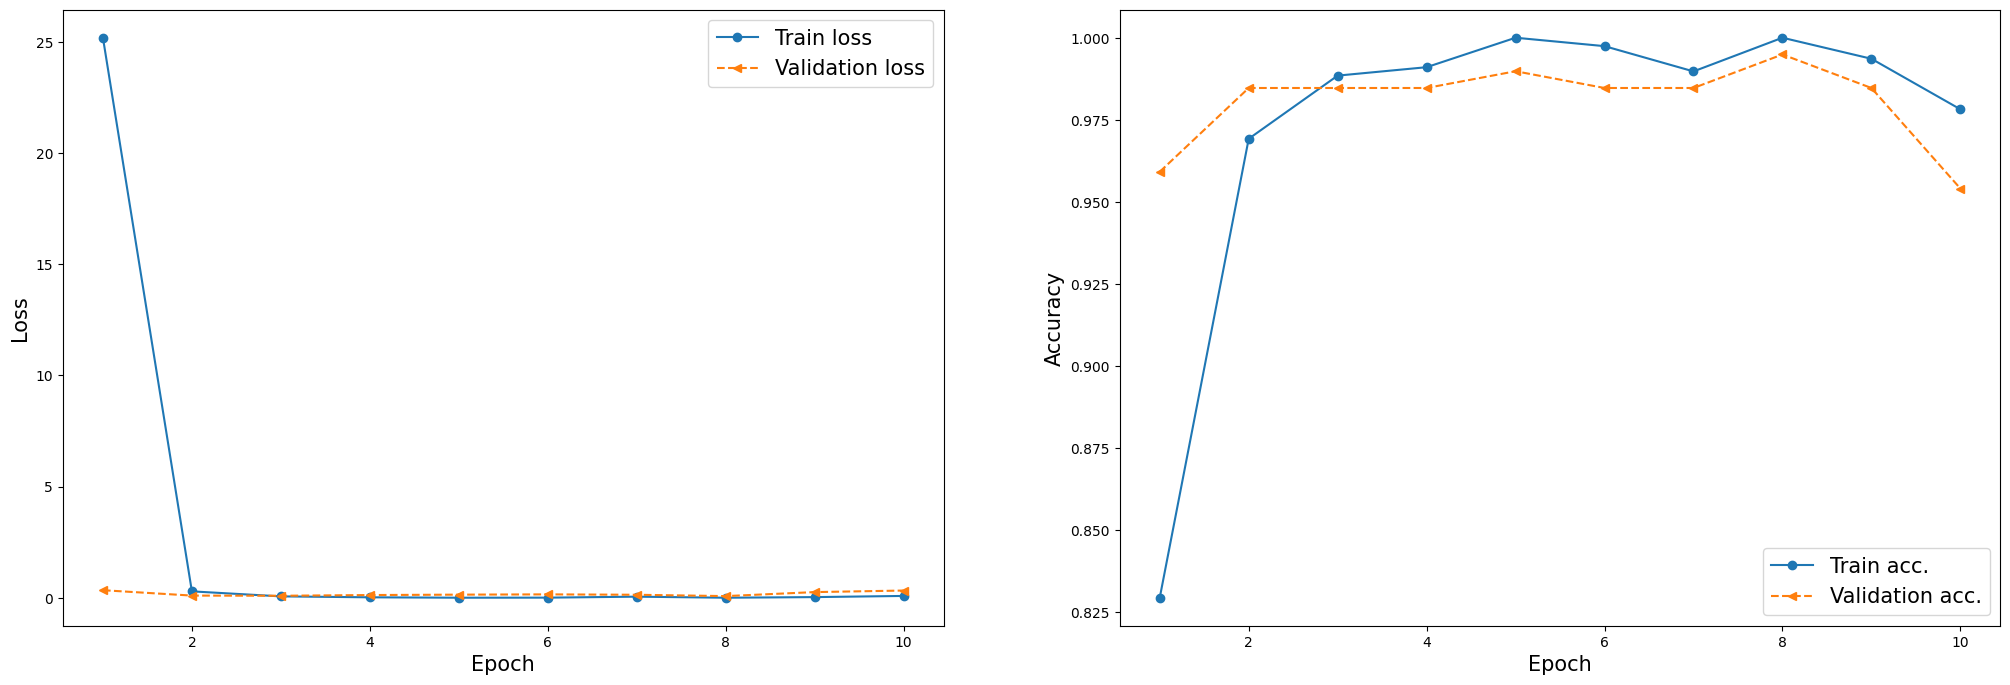

In [281]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [308]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print(' (True Negatives): ', cm[0][0])
    print('(False Positives): ', cm[0][1])
    print('(False Negatives): ', cm[1][0])
    print(' (True Positives): ', cm[1][1])
    print('Total: ', np.sum(cm[1]))

In [309]:
baseline_results = model.evaluate(xtestt, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.4000184237957001
tp :  118.0
fp :  0.0
tn :  122.0
fn :  4.0
accuracy :  0.9836065769195557
precision :  1.0
recall :  0.9672130942344666
auc :  0.9836065769195557



In [296]:
test_results = model.evaluate(xtestt, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[5]*100))

8/8 [==============================] - 0s 10ms/step - loss: 0.4000 - tp: 118.0000 - fp: 0.0000e+00 - tn: 122.0000 - fn: 4.0000 - accuracy: 0.9836 - precision: 1.0000 - recall: 0.9672 - auc: 0.9836

Test Acc. 98.36%


In [305]:
y_test_pred_tf = model.predict(x=xtestt)

# set predicted label based on highest probability
y_test_maxpred_tf =np.array( list(map(lambda x: 0 if x else 1, (model.predict(xtestt)<0.5))))

print('Test, misclassified examples: %d' % (y_test != y_test_maxpred_tf).sum())
error_test_tf = (y_test != y_test_maxpred_tf).sum()/len(y_test_maxpred_tf)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))

8/8 [==============================] - 0s 7ms/step
Test, misclassified examples: 4
Test, prediction accuracy: 0.984


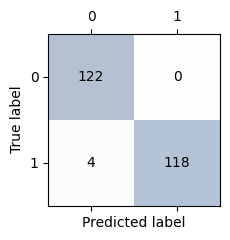

In [306]:
conf_matrix = tf.math.confusion_matrix(
    y_test,
    y_test_maxpred_tf,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

cm = confusion_matrix_plot(conf_matrix.numpy())

In [307]:
# note that TensorFlow assumes that the positive class is output = 1
r = tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
r.update_state(
    #test_y.flatten(),
    #test_y_pred,
    y_test,
    y_test_maxpred_tf,
    
)
print("Recall score: %.3f" %r.result().numpy())

Recall score: 0.967
